In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
import progressbar
import os
from os import listdir

## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.4.0
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Apr 14 2021 11:56:48CEST



## Load of the data

In [3]:
from process import loaddata
class_data0 = loaddata("../data/{}.csv".format('low_ene'))

In [20]:
class_data0 = class_data0[class_data0[:,0] > 0.001]

In [22]:
class_data0.shape

(531585, 14)

In [21]:
y0 = class_data0[:,0]
A0 = class_data0
A0[:,9] = A0[:,13]
x0 = class_data0[:,1:10]

## Check to see if the data are balanced now

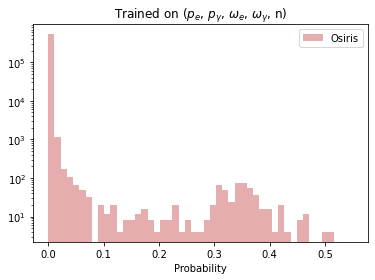

In [25]:
from matplotlib import pyplot
y0 = np.array(y0)
bins = np.linspace(0, 0.55, 50)
n, edges, _ = pyplot.hist(y0, bins, color = 'indianred', alpha=0.5, label='Osiris')
#pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()

In [52]:
def balance_data(class_data, nbins):

    from matplotlib import pyplot as plt
    y = class_data[:,0]
    n, edges, _ = plt.hist(y, nbins, color = 'indianred', alpha=0.5, label='Osiris')
    n_max = n.max()
    data = []

    for class_ in class_data:
        for i in range(len(n)):
            edges_min = edges[i]
            edges_max = edges[i+1]
            if class_[0] > edges_min and class_[0] < edges_max:
                for j in range(int(n_max/n[i])):
                    data.append(class_)
                break

    return np.array(data)

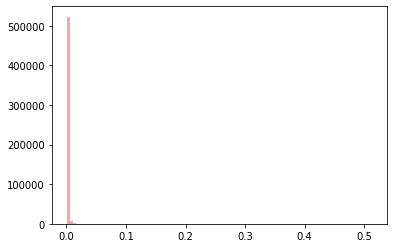

In [53]:
class_data = balance_data(class_data0, 100)

In [54]:
np.random.shuffle(class_data)
y = class_data[:,0]
A = class_data
print(A[0])
A[:,9] = A[:,13]
print(A[0])
x = class_data[:,1:10]
print(x[0])
print(x.shape)

[ 1.90684774e-01 -1.46123555e-01  1.77115860e-01 -7.74108079e-02
 -1.68575786e-01  1.85246188e-01  1.83115385e-01  8.62400000e+07
  8.59200000e+07  9.37569433e-06  4.04303363e-01 -4.13583152e-01
  2.14926385e-01  9.37569433e-06]
[ 1.90684774e-01 -1.46123555e-01  1.77115860e-01 -7.74108079e-02
 -1.68575786e-01  1.85246188e-01  1.83115385e-01  8.62400000e+07
  8.59200000e+07  9.37569433e-06  4.04303363e-01 -4.13583152e-01
  2.14926385e-01  9.37569433e-06]
[-1.46123555e-01  1.77115860e-01 -7.74108079e-02 -1.68575786e-01
  1.85246188e-01  1.83115385e-01  8.62400000e+07  8.59200000e+07
  9.37569433e-06]
(38154174, 9)


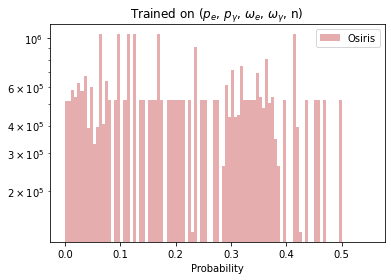

In [55]:
from matplotlib import pyplot
y0 = np.array(y0)
bins = np.linspace(0, 0.55, 100)
pyplot.hist(y, bins, color = 'indianred', alpha=0.5, label='Osiris')
#pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()

In [56]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 28615630 
Valuation sample: 9538544


In [ ]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [44]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

In [45]:
def build_model() :
    model = models.Sequential()
    model.add (BatchNormalization(input_dim = 9))
    model.add (layers.Dense (12 , activation = "sigmoid"))
    model.add (layers.Dense (9 , activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = 'mae' , metrics = ["mape"])
    return model

In [ ]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_noposition2.h5".format('probability'))

Epoch 1/1000
1668/1668 [==============================] - 14s 8ms/step - loss: 0.1329 - mape: 540.4114 - val_loss: 0.0794 - val_mape: 153.3372
Epoch 2/1000
1668/1668 [==============================] - 7s 4ms/step - loss: 0.0753 - mape: 119.3088 - val_loss: 0.0605 - val_mape: 78.1843
Epoch 3/1000
1668/1668 [==============================] - 6s 4ms/step - loss: 0.0610 - mape: 73.5968 - val_loss: 0.0490 - val_mape: 63.1923
Epoch 4/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0518 - mape: 61.9396 - val_loss: 0.0461 - val_mape: 59.9148
Epoch 5/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0479 - mape: 58.6098 - val_loss: 0.0400 - val_mape: 54.7601
Epoch 6/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0449 - mape: 56.7082 - val_loss: 0.0378 - val_mape: 52.3916
Epoch 7/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0431 - mape: 54.5080 - val_loss: 0.0378 - val_mape: 52.2395
Epoch 8/1000
166

Epoch 59/1000
1668/1668 [==============================] - 6s 3ms/step - loss: 0.0257 - mape: 35.7608 - val_loss: 0.0215 - val_mape: 33.7062
Epoch 60/1000
1668/1668 [==============================] - 6s 3ms/step - loss: 0.0256 - mape: 35.6398 - val_loss: 0.0215 - val_mape: 33.8495
Epoch 61/1000
1668/1668 [==============================] - 6s 3ms/step - loss: 0.0257 - mape: 35.5311 - val_loss: 0.0218 - val_mape: 32.8525
Epoch 62/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0254 - mape: 35.2739 - val_loss: 0.0206 - val_mape: 32.5743
Epoch 63/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0253 - mape: 35.0563 - val_loss: 0.0212 - val_mape: 33.3327
Epoch 64/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0252 - mape: 34.8321 - val_loss: 0.0206 - val_mape: 32.6226
Epoch 65/1000
1668/1668 [==============================] - 5s 3ms/step - loss: 0.0252 - mape: 34.8140 - val_loss: 0.0235 - val_mape: 34.3149
Epoch 66/1000

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['mape']
val_accuracy = history.history['val_mape']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (mae))')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('mape')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
#fig.savefig("acc+loss_drop.pdf")
fig.show()

## Probability density distribution

In [ ]:
y0 = class_data0[:,0]
A0 = class_data0
A0[:,9] = A0[:,13]
x0 = class_data0[:,1:10]

In [ ]:
y_pred = model.predict(x0)

In [ ]:
y_pred

In [ ]:
from matplotlib import pyplot
y = np.array(y)
bins = np.linspace(0, 0.8, 100)
pyplot.hist(y0, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()